In [1]:
import pandas as pd

# Read in the North Peak Totals

In [2]:
weather = pd.read_csv("06_07_NPtotals.csv", index_col="date")
weather

,New Snow,Season Total,Settled Base,H2O,Total H20
date,,,,,
10/15/2006,NaN,57.0,NaN,NaN,0.000
10/16/2006,NaN,57.0,NaN,NaN,0.000
10/17/2006,NaN,57.0,NaN,NaN,0.000
10/18/2006,NaN,57.0,NaN,NaN,0.000
10/19/2006,NaN,57.0,NaN,NaN,0.000
...,...,...,...,...,...
4/11/2023,0.0,231.5,53.0,0.0,11.129
4/12/2023,0.0,231.5,52.0,0.0,11.129
4/13/2023,0.0,231.5,51.0,0.0,11.129


# Determine Null Value Amounts

In [3]:
weather.apply(pd.isnull).sum()/weather.shape[0]

New Snow        0.037688
Season Total    0.011817
Settled Base    0.141169
H2O             0.130629
Total H20       0.005430
dtype: float64

# Change Columns for editing

In [4]:
weather.columns = ["snow", "total_snow", "base", "precip", "total_precip"]

In [5]:
weather.apply(pd.isnull).sum()

snow            118
total_snow       37
base            442
precip          409
total_precip     17
dtype: int64

# Forward fill Base and apply 0 for inital values

In [6]:
weather["base"] = weather["base"].ffill()
weather["base"] = weather["base"].fillna(0)

# Interpolate Total Snow and Precip

In [7]:
weather["total_snow"] = weather["total_snow"].interpolate()
weather["total_precip"] = weather["total_precip"].interpolate()

# Plot to Check on Data 

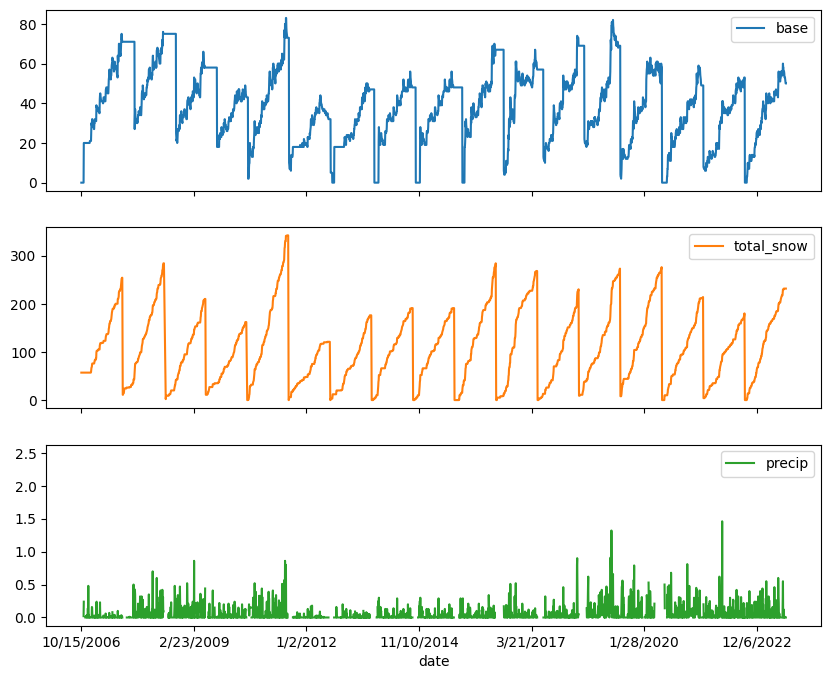

In [8]:
import matplotlib.pyplot as plt

weather[['base', 'total_snow', 'precip']].plot(subplots=True, figsize=(10, 8))
plt.show()


# Fill snow and precip with 0 if Null

In [9]:
weather["snow"] = weather["snow"].fillna(0)
weather["precip"] = weather["precip"].fillna(0)

# Confirm all Null Values replaced

In [10]:
print(weather.isna().sum())

snow            0
total_snow      0
base            0
precip          0
total_precip    0
dtype: int64


# Confirm Object Types and Index is in Date Format

In [11]:
weather.dtypes

snow            float64
total_snow      float64
base            float64
precip          float64
total_precip    float64
dtype: object

In [12]:
weather.index

Index(['10/15/2006', '10/16/2006', '10/17/2006', '10/18/2006', '10/19/2006',
       '10/20/2006', '10/21/2006', '10/22/2006', '10/23/2006', '10/24/2006',
       ...
         '4/6/2023',   '4/7/2023',   '4/8/2023',   '4/9/2023',  '4/10/2023',
        '4/11/2023',  '4/12/2023',  '4/13/2023',  '4/14/2023',  '4/15/2023'],
      dtype='object', name='date', length=3131)

In [13]:
weather.index = pd.to_datetime(weather.index)

In [14]:
weather.index

DatetimeIndex(['2006-10-15', '2006-10-16', '2006-10-17', '2006-10-18',
               '2006-10-19', '2006-10-20', '2006-10-21', '2006-10-22',
               '2006-10-23', '2006-10-24',
               ...
               '2023-04-06', '2023-04-07', '2023-04-08', '2023-04-09',
               '2023-04-10', '2023-04-11', '2023-04-12', '2023-04-13',
               '2023-04-14', '2023-04-15'],
              dtype='datetime64[ns]', name='date', length=3131, freq=None)

# Remove rows without a date

In [18]:

weather = weather[~weather.index.isna()]


# Save a Clean NP Weather CSV

In [19]:

weather_reset = weather.reset_index()

weather_reset.to_csv("NP_data.csv", index=False)
